In [5]:
import math
def AMS(s, b):
    return round(math.sqrt(2*((s+b)*math.log(1+s/b)-s)),3)
def percentage(a,b): return round(abs(2*(a-b)*100/(a+b)),3)

In [8]:
print(percentage(AMS(166, 36075+690+1511), AMS(145, 31110+1511)))
print(percentage(AMS(389, 9062+349+758), AMS(351, 8144+758)))
print(percentage(AMS(320, 3613+60+240), AMS(296, 3311+240)))
print(percentage(AMS(590, 3632+46+184), AMS(549, 3316+184)))
print(percentage(AMS(23, 114+6+17), AMS(21, 99+17)))
print(percentage(AMS(21, 19+7), AMS(19, 15+7)))

5.576
3.639
2.955
2.336
0.998
2.272


In [2]:
!ls ../results/2018/makeSimple_DF

output_test_data.coffea     output_test_signal.coffea
output_test_diboson.coffea  output_test_st.coffea
output_test_dy.coffea	    output_test_tt.coffea
output_test_ewk.coffea	    output_test_wjets.coffea
output_test_higgs.coffea    output_vanish_higgs.coffea


In [34]:
import numpy as np
import pandas as pd
import glob, os, json, argparse
filters = [('label', '!=', 3)]

print("Start loading df")
#Load df
data_gg = pd.read_parquet('../results/csv4BDT/makeDF_v9_signal_signalAlt_oc_gg_withyear.parquet', engine='pyarrow', columns=['weight','ept','mpt','label','sample','e_m_Mass',"is2016preVFP","is2016postVFP","is2017","is2018"], filters=filters)
data_vbf = pd.read_parquet('../results/csv4BDT/makeDF_v9_signal_signalAlt_oc_vbf_withyear.parquet', engine='pyarrow', columns=['weight','ept','mpt','sample','label','e_m_Mass',"is2016preVFP","is2016postVFP","is2017","is2018"], filters=filters)

Start loading df


In [35]:
data_cuts_os = pd.concat([data_gg, data_vbf])

In [41]:
data_cuts_os[data_cuts_os.ept.gt(25)&data_cuts_os.mpt.gt(20)].groupby('sample')['weight'].sum()

sample
1     23104.792947
2      1613.063218
4     24310.251699
5      1640.052895
6     21986.986005
7      1593.432914
32    23138.606911
33     1746.570693
34    17269.211170
35     1588.180196
36    15675.940592
37     1520.847316
38    14330.340859
39     1452.219571
Name: weight, dtype: float64

In [39]:
import sys
sys.path.append("/afs/crc.nd.edu/user/k/kho2/Flavour-Violating-Coffea/")
import find_samples
find_samples.samples_to_run['makeDF']
samples = find_samples.samples_to_run['makeDF']
print([sample for sample in samples if 'LFV' in sample])

['GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'GluGlu_LFV_HToEMu_M120', 'VBF_LFV_HToEMu_M120', 'GluGlu_LFV_HToEMu_M130', 'VBF_LFV_HToEMu_M130', 'GluGlu_LFV_HToEMu_M110', 'VBF_LFV_HToEMu_M110', 'GluGlu_LFV_HToEMu_M140', 'VBF_LFV_HToEMu_M140', 'GluGlu_LFV_HToEMu_M150', 'VBF_LFV_HToEMu_M150', 'GluGlu_LFV_HToEMu_M160', 'VBF_LFV_HToEMu_M160']


In [32]:
data_m = data_cuts_os[data_cuts_os.label.eq(110)&data_cuts_os['sample'].eq(32)]
mpts = [15, 20]
epts = [20, 25]
for mpt in mpts:
    for ept in epts:
        sig = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt)]['weight'].sum()
        print(ept, mpt, sig)

20 15 23847.4989331541
25 15 23369.960618664263
20 20 23616.145225959222
25 20 23138.606911469404


In [33]:
data_m = data_cuts_os[data_cuts_os.label.eq(120)&data_cuts_os['sample'].eq(4)]
mpts = [15, 20]
epts = [20, 25]
for mpt in mpts:
    for ept in epts:
        sig = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt)]['weight'].sum()
        print(ept, mpt, sig)

20 15 24870.903934923765
25 15 24495.343273025395
20 20 24685.81236092693
25 20 24310.251699028562


In [3]:
weight_list_gg = data_gg[data_gg['label'].eq(0)].groupby('sample')['weight'].sum().sort_values()
weight_list_gg, weight_list_gg*100 / data_gg[data_gg['label'].eq(0)]['weight'].sum()

(sample
 29        0.294980
 15        1.071610
 30        2.538464
 28        4.893568
 25        5.012859
 31        5.423754
 26        6.224572
 27       10.027567
 20       22.994946
 22       44.434651
 23       50.857373
 8        92.729137
 24      104.486854
 18      112.437466
 19      168.184845
 14      582.636000
 13     1105.648756
 9      1332.364219
 16     4464.098169
 17     4466.070991
 11     5492.002779
 3     36674.972049
 10    39587.482213
 Name: weight, dtype: float64,
 sample
 29     0.000313
 15     0.001136
 30     0.002691
 28     0.005187
 25     0.005314
 31     0.005749
 26     0.006598
 27     0.010630
 20     0.024375
 22     0.047102
 23     0.053910
 8      0.098296
 24     0.110759
 18     0.119187
 19     0.178281
 14     0.617612
 13     1.172022
 9      1.412347
 16     4.732081
 17     4.734172
 11     5.821692
 3     38.876597
 10    41.963948
 Name: weight, dtype: float64)

In [4]:
weight_list_vbf = data_vbf[data_vbf['label'].eq(0)].groupby('sample')['weight'].sum().sort_values()
weight_list_vbf, weight_list_vbf*100 / data_vbf[data_vbf['label'].eq(0)]['weight'].sum()

(sample
 30       0.059642
 15       0.094240
 26       0.099994
 28       0.100178
 29       0.145423
 27       0.192730
 31       0.405960
 8        1.197483
 24       1.797822
 25       2.573038
 20       3.147606
 22       4.142991
 18       5.681396
 23       7.617579
 19      10.916016
 13      21.511789
 9       27.273035
 14      42.278287
 11      61.688582
 16     126.006742
 17     128.347474
 10     366.243272
 3     2406.594977
 Name: weight, dtype: float64,
 sample
 30     0.001853
 15     0.002928
 26     0.003107
 28     0.003113
 29     0.004519
 27     0.005989
 31     0.012615
 8      0.037211
 24     0.055866
 25     0.079955
 20     0.097809
 22     0.128740
 18     0.176544
 23     0.236709
 19     0.339205
 13     0.668459
 9      0.847484
 14     1.313759
 11     1.916916
 16     3.915543
 17     3.988280
 10    11.380673
 3     74.782723
 Name: weight, dtype: float64)

In [2]:
data_cuts_os = df[df.opp_charge.eq(1)&df.e_m_Mass.gt(110)&df.e_m_Mass.lt(160)].drop('opp_charge', axis=1, inplace=False)

In [9]:
sigm = data_cuts_os[data_cuts_os.mtrigger.eq(1)&data_cuts_os.label.eq(1)]['weight'].sum()
datam = data_cuts_os[data_cuts_os.mtrigger.eq(1)&data_cuts_os.label.eq(3)]['weight'].sum()
sigem = data_cuts_os[data_cuts_os.label.eq(1)]['weight'].sum()
dataem = data_cuts_os[data_cuts_os.label.eq(3)]['weight'].sum()

In [8]:
AMS(sigm, datam), AMS(sigem, dataem)

(96.158, 98.16)

In [10]:
AMS(sigm, datam), AMS(sigem, dataem)

(95.742, 97.236)

In [ ]:
sigm = data_cuts_os[data_cuts_os.mtrigger.eq(1)&data_cuts_os.label.eq(1)&data_cuts_os.ept.gt(25)&data_cuts_os.mpt.gt(20)]['weight'].sum()
datam = data_cuts_os[data_cuts_os.mtrigger.eq(1)&data_cuts_os.label.eq(3)&data_cuts_os.ept.gt(25)&data_cuts_os.mpt.gt(20)]['weight'].sum()
sigem = data_cuts_os[data_cuts_os.label.eq(1)&data_cuts_os.ept.gt(25)&data_cuts_os.mpt.gt(20)]['weight'].sum()
dataem = data_cuts_os[data_cuts_os.label.eq(3)&data_cuts_os.ept.gt(25)&data_cuts_os.mpt.gt(20)]['weight'].sum()

In [7]:
print (otherevents[otherevents.label.eq(3) & otherevents.njets.eq(0)]['weight'].sum(),
otherevents[otherevents.label.eq(1) & otherevents.njets.eq(0)]['weight'].sum()*5.9*10e-3,
otherevents[otherevents.label.eq(3) & otherevents.njets.eq(1)]['weight'].sum(),
otherevents[otherevents.label.eq(1) & otherevents.njets.eq(1)]['weight'].sum()*5.9*10e-3,
otherevents[otherevents.label.eq(3) & otherevents.njets.ge(2)]['weight'].sum(),
otherevents[otherevents.label.eq(1) & otherevents.njets.ge(2)]['weight'].sum()*5.9*10e-3)

26927.0 887.2420973088041 17477.0 411.7384370213522 12946.0 197.38583053200244


In [12]:
887.2420973088041+411.7384370213522+197.38583053200244

1496.366364862159

In [15]:
197.38583053200244/1496.366364862159

0.1319100957940772

In [40]:
gap_events = data_cuts_os[(data_cuts_os.eEta.abs() < 1.566) & (data_cuts_os.eEta.abs() > 1.4442)]
ebevents = data_cuts_os[(data_cuts_os.eEta.abs() < 1.4442)]
eeevents = data_cuts_os[(data_cuts_os.eEta.abs() > 1.566)]

In [41]:
fullsig, fullbkg = data_cuts_os[data_cuts_os.label==1]['weight'].sum(), data_cuts_os[data_cuts_os.label==0]['weight'].sum()

In [42]:
gapsig, gapbkg = gap_events[gap_events.label==1]['weight'].sum(), gap_events[gap_events.label==0]['weight'].sum()

In [43]:
gapsig/fullsig

0.02667865665802667

In [44]:
percentage(AMS(fullsig, fullbkg), AMS(fullsig-gapsig, fullbkg-gapbkg))

1.3

In [9]:
otherevents.columns

Index(['sample', 'label', 'weight', 'njets', 'e_m_Mass', 'e_m_Mass_reso',
       'met', 'eEta', 'mEta', 'mpt', 'ept', 'empt', 'emEta', 'DeltaEta_e_m',
       'DeltaR_e_m', 'DeltaPhi_e_met', 'DeltaPhi_m_met', 'DeltaPhi_em_met',
       'e_mvaTTH', 'm_mvaTTH', 'e_mvaFall17V2Iso', 'e_mvaFall17V2noIso',
       'mtrigger', 'etrigger', 'j1pt', 'j1Eta', 'DeltaEta_j1_em',
       'DeltaR_j1_em', 'isVBFcat', 'j2pt', 'j2Eta', 'j1_j2_mass',
       'DeltaEta_em_j1j2', 'DeltaR_em_j1j2', 'DeltaEta_j2_em', 'DeltaR_j2_em',
       'DeltaEta_j1_j2', 'DeltaR_j1_j2', 'Zeppenfeld_DeltaEta', 'Rpt',
       'pt_cen_Deltapt', 'Ht_had'],
      dtype='object')

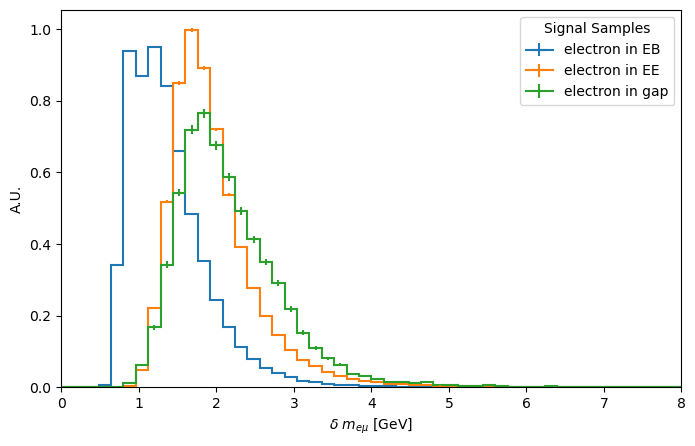

In [53]:
from coffea import hist
h = hist.Hist("A.U.", hist.Cat("dataset", "Signal Samples"), hist.Bin('e_m_Mass', '$\delta$ $m_{e\mu}$ [GeV]', 50, 0, 8))
h.fill(dataset = 'electron in gap', e_m_Mass = gap_events[gap_events.label==1].e_m_Mass_reso.to_numpy(), weight=gap_events[gap_events.label==1].weight.to_numpy())
h.fill(dataset = 'electron in EB', e_m_Mass = ebevents[ebevents.label==1].e_m_Mass_reso.to_numpy(), weight=ebevents[ebevents.label==1].weight.to_numpy())
h.fill(dataset = 'electron in EE', e_m_Mass = eeevents[eeevents.label==1].e_m_Mass_reso.to_numpy(), weight=eeevents[eeevents.label==1].weight.to_numpy())
from matplotlib.pyplot import figure
fig=figure(figsize=(8, 5), dpi=100)
a = hist.plot1d(h, density=True)
fig.savefig(f'../XGBoost-for-HtoEMu/plots/MCData/eSF/gapE_emMass_reso.png')

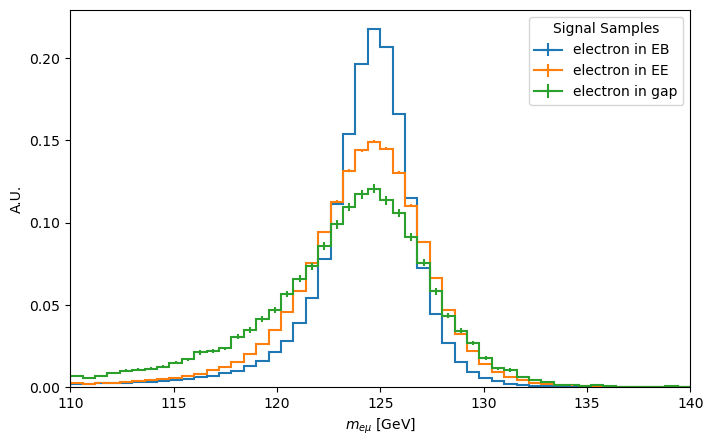

In [52]:
from coffea import hist
h = hist.Hist("A.U.", hist.Cat("dataset", "Signal Samples"), hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 50, 110, 140))
h.fill(dataset = 'electron in gap', e_m_Mass = gap_events[gap_events.label==1].e_m_Mass.to_numpy(), weight=gap_events[gap_events.label==1].weight.to_numpy())
h.fill(dataset = 'electron in EB', e_m_Mass = ebevents[ebevents.label==1].e_m_Mass.to_numpy(), weight=ebevents[ebevents.label==1].weight.to_numpy())
h.fill(dataset = 'electron in EE', e_m_Mass = eeevents[eeevents.label==1].e_m_Mass.to_numpy(), weight=eeevents[eeevents.label==1].weight.to_numpy())
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 5), dpi=100)
a = hist.plot1d(h, density=True)
fig.savefig(f'../XGBoost-for-HtoEMu/plots/MCData/eSF/gapE_emMass.png')

In [5]:
data_cuts_os_gg = data_cuts_os[(data_cuts_os['sample']==1) & (data_cuts_os['njets']>=2)]
data_cuts_os_vbf = data_cuts_os[(data_cuts_os['sample']==2) & (data_cuts_os['njets']>=2)]

In [19]:
data_cuts_os_vbf[data_cuts_os_vbf['j1_j2_mass'].gt(400) & data_cuts_os_vbf['DeltaEta_j1_j2'].gt(2.5)]['weight'].sum()

637.9439244480118

In [20]:
data_cuts_os_gg[data_cuts_os_gg['j1_j2_mass'].gt(400) & data_cuts_os_gg['DeltaEta_j1_j2'].gt(2.5)]['weight'].sum()

452.98694394926747

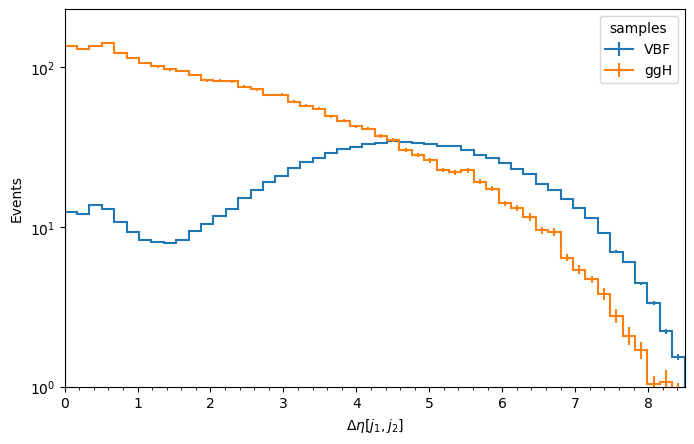

In [25]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('DeltaEta_j1_j2', '$\Delta \eta[j_{1}, j_{2}]$', 50, 0, 8.5))
h.fill(dataset = 'ggH', DeltaEta_j1_j2 = data_cuts_os_gg.DeltaEta_j1_j2.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
h.fill(dataset = 'VBF', DeltaEta_j1_j2 = data_cuts_os_vbf.DeltaEta_j1_j2.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 5), dpi=100)
ax = hist.plot1d(h)
ax.set_yscale('log')
ax.set_ylim(1, max(h.sum("dataset").values()[()])*1.5)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
fig.savefig(f'../plots/ARCchecks/etajj_gg_vbf.png')

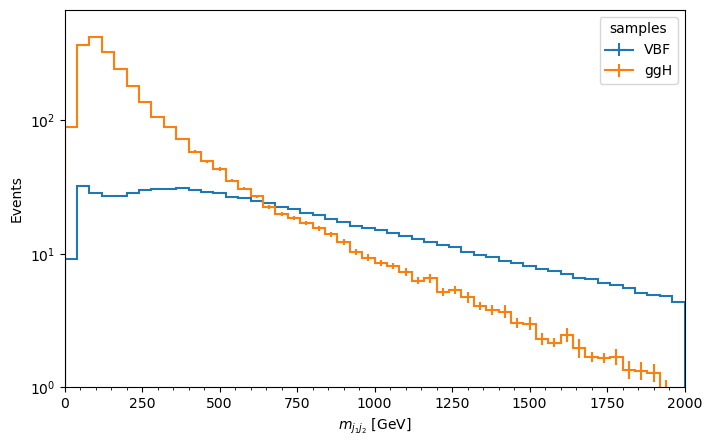

In [26]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('j1_j2_mass', '$m_{j_{1}j_{2}}$ [GeV]', 50, 0, 2000))
h.fill(dataset = 'ggH', j1_j2_mass = data_cuts_os_gg.j1_j2_mass.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
h.fill(dataset = 'VBF', j1_j2_mass = data_cuts_os_vbf.j1_j2_mass.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
fig = figure(figsize=(8, 5), dpi=100)
ax = hist.plot1d(h)
ax.set_yscale('log')
ax.set_ylim(1, max(h.sum("dataset").values()[()])*1.5)
ax.minorticks_on()
ax.yaxis.set_tick_params(which='minor', bottom=False)
fig.savefig(f'../plots/ARCchecks/mjj_gg_vbf.png')

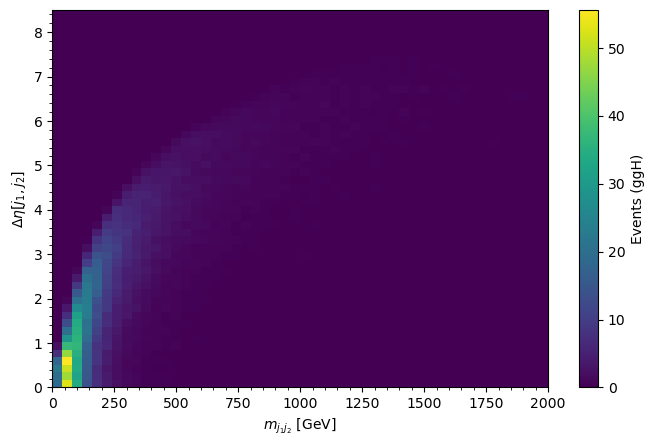

In [27]:
from coffea import hist
import matplotlib.pyplot as plt
h = hist.Hist("Events (ggH)", hist.Cat("dataset", "samples"), hist.Bin('DeltaEta_j1_j2', '$\Delta \eta[j_{1}, j_{2}]$', 50, 0, 8.5), hist.Bin('j1_j2_mass', '$m_{j_{1}j_{2}}$ [GeV]', 50, 0, 2000))
h.fill(dataset = 'ggH', DeltaEta_j1_j2 = data_cuts_os_gg.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_gg.j1_j2_mass.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
#h.fill(dataset = 'VBF', DeltaEta_j1_j2 = data_cuts_os_vbf.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_vbf.j1_j2_mass.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
hist.plot2d(h.integrate('dataset'), xaxis='j1_j2_mass', ax=ax)
ax.minorticks_on()
fig.savefig(f'../plots/ARCchecks/gg_2d.png')

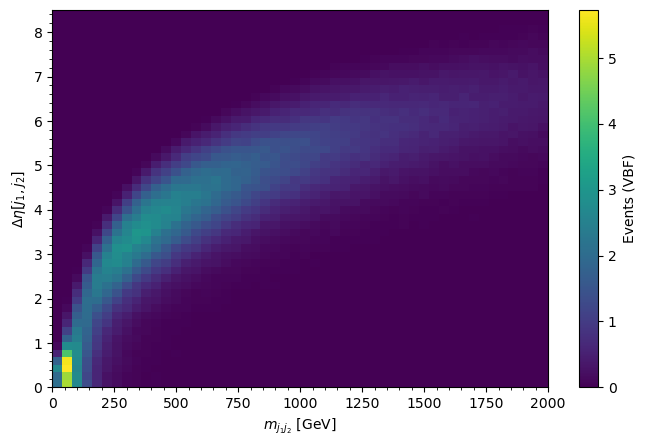

In [28]:
from coffea import hist
import matplotlib.pyplot as plt
h = hist.Hist("Events (VBF)", hist.Cat("dataset", "samples"), hist.Bin('DeltaEta_j1_j2', '$\Delta \eta[j_{1}, j_{2}]$', 50, 0, 8.5), hist.Bin('j1_j2_mass', '$m_{j_{1}j_{2}}$ [GeV]', 50, 0, 2000))
#h.fill(dataset = 'ggH', DeltaEta_j1_j2 = data_cuts_os_gg.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_gg.j1_j2_mass.to_numpy(), weight=data_cuts_os_gg.weight.to_numpy())
h.fill(dataset = 'VBF', DeltaEta_j1_j2 = data_cuts_os_vbf.DeltaEta_j1_j2.to_numpy(), j1_j2_mass = data_cuts_os_vbf.j1_j2_mass.to_numpy(), weight=data_cuts_os_vbf.weight.to_numpy())
from matplotlib.pyplot import figure
fig, ax = plt.subplots(figsize=(8, 5), dpi=100)
hist.plot2d(h.integrate('dataset'), xaxis='j1_j2_mass', ax=ax)
ax.minorticks_on()
fig.savefig(f'../plots/ARCchecks/vbf_2d.png')

In [49]:
bkg = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'TTTo2L2Nu', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5']
print([bkg.index(i) for i in bkg if 'HToTauTau' in i])
print([bkg.index(i) for i in bkg if 'HToWW' in i])
subsubsub = data_cuts_os[data_cuts_os.e_m_Mass.gt(110) & data_cuts_os.e_m_Mass.lt(160)  & data_cuts_os.mtrigger.lt(1) & data_cuts_os.ept.gt(24)].weight.sum()

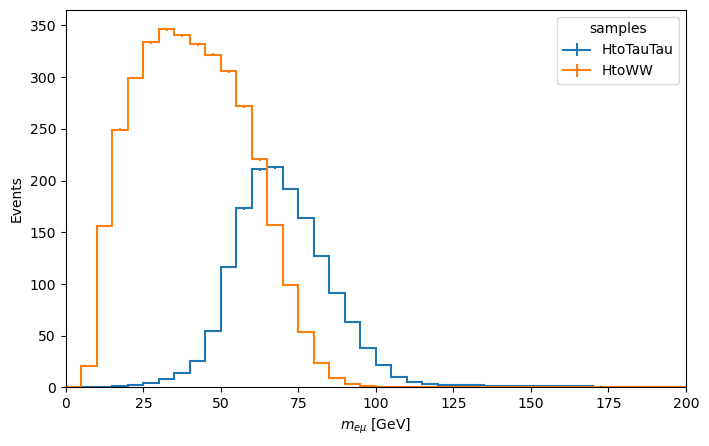

In [57]:
from coffea import hist
h = hist.Hist("Events", hist.Cat("dataset", "samples"), hist.Bin('e_m_Mass', '$m_{e\mu}$ [GeV]', 40, 0, 200))
h.fill(dataset = 'HtoTauTau (GG)', e_m_Mass = data_cuts_os[data_cuts_os['sample'].isin([20, 21, 22, 23, 26])].e_m_Mass.to_numpy(), weight=data_cuts_os[data_cuts_os['sample'].isin([20, 21, 22, 23, 26])].weight.to_numpy())
h.fill(dataset = 'HtoWW', e_m_Mass = data_cuts_os[data_cuts_os['sample'].isin([24,25])].e_m_Mass.to_numpy(), weight=data_cuts_os[data_cuts_os['sample'].isin([24,25])].weight.to_numpy())
from matplotlib.pyplot import figure
figure(figsize=(8, 5), dpi=100)
a = hist.plot1d(h)

In [20]:
data_cuts_os[data_cuts_os.mtrigger.eq(1)]['sample'].describe()

count    701140.000000
mean         24.162597
std           1.393341
min          20.000000
25%          24.000000
50%          25.000000
75%          25.000000
max          26.000000
Name: sample, dtype: float64

In [11]:
data_cuts_os[data_cuts_os.mtrigger.eq(1)].weight.sum()

1777.229677707188

In [9]:
data_cuts_os[data_cuts_os.mtrigger.eq(1)].weight.sum()

3.610694918431994

In [116]:
samples = ['data', 'GluGlu_LFV_HToEMu_M125', 'VBF_LFV_HToEMu_M125', 'TTTo2L2Nu', 'ZZ_TuneCP5', 'WZ_TuneCP5', 'WW_TuneCP5', 'DYJetsToLL_M-50', 'DYJetsToLL_M-10to50', 'WGToLNuG_TuneCP5', 'TTToSemiLeptonic', 'TTToHadronic', 'ST_tW_antitop_5f_inclusiveDecays', 'ST_tW_top_5f_inclusiveDecays', 'ST_t-channel_antitop_4f_InclusiveDecays', 'ST_t-channel_top_4f_InclusiveDecays', 'EWKZ2Jets_ZToLL', 'EWKZ2Jets_ZToNuNu', 'EWKWMinus2Jets', 'EWKWPlus2Jets', 'GluGluHToTauTau', 'VBFHToTauTau', 'WminusHToTauTau', 'WplusHToTauTau', 'GluGluHToWWTo2L2Nu', 'VBFHToWWTo2L2Nu', 'ZHToTauTau', 'WJetsToLNu_TuneCP5']
[samples.index(i) for i in samples if 'TT' in i]
data_cuts_os.loc[((data_cuts_os['sample']==3) | (data_cuts_os['sample']==10) | (data_cuts_os['sample']==11)), ['weight']] *= 1.0711607711238926

In [5]:
data_cuts_os = pd.concat([data_gg, data_vbf])

In [8]:
data_m = data_cuts_os[data_cuts_os.e_m_Mass.gt(100)&data_cuts_os.e_m_Mass.lt(120)]
mpts = [15, 20]
epts = [20, 25]
for mpt in mpts:
    for ept in epts:
        bkg = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt) & data_m.label.eq(0)]['weight'].sum()
        sig = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt) & data_m.label.eq(110)]['weight'].sum()
        print(ept, mpt, AMS(sig*0.0059, bkg), round(sig*0.0059), round(bkg))

20 15 0.877 149 28650
25 15 0.878 146 27448
20 20 0.88 147 27901
25 20 0.881 144 26700


In [9]:
data_m = data_cuts_os[data_cuts_os.e_m_Mass.gt(150)&data_cuts_os.e_m_Mass.lt(170)]
mpts = [15, 20]
epts = [20, 25]
for mpt in mpts:
    for ept in epts:
        bkg = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt) & data_m.label.eq(0)]['weight'].sum()
        sig = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt) & data_m.label.eq(160)]['weight'].sum()
        print(ept, mpt, AMS(sig*0.0059, bkg), round(sig*0.0059), round(bkg))

20 15 0.743 89 14332
25 15 0.746 89 14049
20 20 0.746 89 14153
25 20 0.749 88 13870


In [10]:
data_m = data_cuts_os[data_cuts_os.e_m_Mass.gt(115)&data_cuts_os.e_m_Mass.lt(135)]
mpts = [15, 20]
epts = [20, 25]
for mpt in mpts:
    for ept in epts:
        bkg = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt) & data_m.label.eq(0)]['weight'].sum()
        sig = data_m[data_m.ept.gt(ept) & data_m.mpt.gt(mpt) & data_m.label.eq(1)]['weight'].sum()
        print(ept, mpt, AMS(sig*0.0059, bkg), round(sig*0.0059), round(bkg))

20 15 0.94 144 23439
25 15 0.943 142 22704
20 20 0.943 143 22959
25 20 0.946 141 22224


In [107]:
data_em = data_cuts_os[(data_cuts_os.etrigger.eq(1) & data_cuts_os.mpt.gt(15))|(data_cuts_os.mtrigger.eq(1) & data_cuts_os.ept.gt(24))]
data_m = data_cuts_os[data_cuts_os.mtrigger.eq(1) & data_cuts_os.ept.gt(24)]
totalbkg_m, totalbkg_em = data_m[data_m.label.eq(0)]['weight'].sum(), data_em[data_em.label.eq(0)]['weight'].sum()
totalsig_m, totalsig_em = data_m[data_m.label.eq(1)]['weight'].sum(), data_em[data_em.label.eq(1)]['weight'].sum()
print('bkg', totalbkg_m, totalbkg_em, percentage(totalbkg_m, totalbkg_em))
print('sig', totalsig_m*0.0059, totalsig_em*0.0059, percentage(totalsig_m, totalsig_em))
print('m', AMS(totalsig_m*0.0059, totalbkg_m))
print('em', AMS(totalsig_em*0.0059, totalbkg_em))
print(percentage(AMS(totalsig_m*0.0059, totalbkg_m), AMS(totalsig_em*0.0059, totalbkg_em)))

bkg 20100.653502799418 23454.67450137778 7.701
sig 136.68773354052857 149.74823727980936 4.56
m 0.963
em 0.977
0.722
